In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, os
import pandas as pd

import pickle

In [2]:
path_exp = os.getcwd()+'/../exp_data'

In [3]:
exper = pd.read_csv(f'{path_exp}/ubq1_15N_updated_spec23_25_36.txt', sep='\t',)
#exper = pd.read_csv(f'{path_exp}/fabien_jacs2013_relaxometry.csv') # data with old incorrect analysis

exper_rb = pd.read_csv(f'/{path_exp}/Ubq_15N_NASR_S2_fig2C.txt', sep='\t')

In [4]:
path_ired =  os.getcwd()

with open(f'/{path_ired}/iRED_all_data.pickle', 'rb') as handle:
    md_data = pickle.load(handle)

In [5]:
root_dir = '/cluster/work/igc/mlehner/nmr_project/1ubq/'

top_path = root_dir + '/ubq_desolv.gro'

trajs = [root_dir + '/test_001/run_001/traj_4us_PBC_fit.xtc', 
         root_dir + '/test_002/run_001/traj_4us_PBC_fit.xtc', 
         root_dir + '/test_015/run_001/traj_4us_PBC_fit.xtc', 
         root_dir + '/test_003/run_001/traj_4us_PBC_fit.xtc', 
         root_dir + '/test_010/run_001/traj_4us_PBC_fit.xtc',
         root_dir + '/test_014/run_001/traj_4us_PBC_fit.xtc',
         root_dir + '/test_011/run_001/traj_4us_PBC_fit.xtc',
         root_dir + '/charmm36/production/ubq_prod_4us_PBC_fit.xtc',
         root_dir + '/test_005/run_001/traj_1us_PBC_fit.xtc',
        ]

dict_id = ['test_001', 'test_002',
           'test_015', 'test_003', 
           'test_010', 'test_014', 
           'test_011', 'charmm',
           'test_005'
          ]

amber = 'ff99SB-nmr1-ildn'

labels = [f'{amber} / TIP3P', f'{amber} (refit methyl) / TIP3P', 
          f'{amber} / TIP4P', f'{amber} (refit methyl) / TIP4P',
          f'{amber} / TIP5P', f'{amber} (refit methyl) / TIP5P',
          'ff99SB-ILDN / TIP3P', 'charmm36m / TIP3P',
          'ff99SB*-ILDN-q / TIP3P',
          ]
"""
labels = [f'amber / TIP3P', f'amber (refit methyl) / TIP3P', 
          f'amber / TIP4P', f'amber (refit methyl) / TIP4P',
          f'amber / TIP5P', f'amber (refit methyl) / TIP5P',
          'ff99SB / TIP3P', 'charmm36m / TIP3P',
          ]
"""

labels_new = [f'Anmr-stn-3P', f'Anmr-met-3P', 
          f'Anmr-stn-4P', f'Anmr-met-4P',
          f'Anmr-stn-5P', f'Anmr-met-5P',
          'Adef-stn-3P', f'C36m-stn-3P',
          'ff99SB*-ILDN-q / TIP3P',    
          ]

colors = ['#05668D', '#26bcf7', 
          '#6A4E24', '#D4B483', 
          'firebrick', '#B46A6B', 
          '#022B3B', '#60046E',
          'seagreen'
         ]

def get_color(label):
    for l, c in zip(labels, colors):
        if l == label:
            return c
        
        
def get_dictID(label):
    for l, id in zip(labels, dict_id):
        if l == label:
            return id

In [6]:
# this allows to plot only a subset of the data (to have data for SI and data for main text)

SUBLIST = ['test_001', 'test_015', 'test_010', 'charmm']

In [7]:
for ff in md_data:
    pass
    #print (ff + '\t' + md_data[ff]['label'])

In [8]:
def break_down_list(res_idx, observable):
    """
    Breaks down the lists so we can plot with the line only between continuous data points
    
    """

    separated_idx = []
    separated_obs = []
    
    cur_idx = []
    cur_obs = []
    
    for i, o in zip(res_idx, observable):
        if len(cur_idx) == 0 or i == cur_idx[-1] + 1:
            cur_idx.append(i)
            cur_obs.append(o)
        else:
            # start a new list, append previous list
            separated_idx.append(cur_idx)
            cur_idx = [i]
            
            separated_obs.append(cur_obs)
            cur_obs = [o]
    
    # We also need to append once we reach the end
    separated_idx.append(cur_idx)
    separated_obs.append(cur_obs)
    return separated_idx, separated_obs

def plot_with_style(ax, res_idx, S_2data, label, color, alpha):
    """
    Here we break down the list into sublists to only draw the line between continuous data-points
    
    """
    sub_idx, sub_obs = break_down_list(res_idx, S_2data[0])
    _, sub_dev = break_down_list(res_idx, S_2data[1])
    
    alpha = 0.7
    
    for i in range(len(sub_idx)):  
        if i == 0:
            ax.plot(sub_idx[i], sub_obs[i], marker = 'D', 
                    mfc=color, mec = color, ms = 2, color=color, label = label, alpha = alpha)
            #ax.errorbar(sub_idx[i], sub_obs[i], np.array(sub_dev[i])*0, 
                        #marker = 'o', mfc=color, mec = color, ms = 2, 
                        #color=color, label = label, alpha=alpha)
            
        else:
            ax.plot(sub_idx[i], sub_obs[i], marker = 'D', mfc=color, mec = color, ms = 2, color=color, alpha = alpha)
            #ax.errorbar(sub_idx[i], sub_obs[i], np.array(sub_dev[i])*0, marker = 'o', 
                        #mfc=color, mec = color, ms = 2, color=color, alpha=alpha)
            
            
def plot_exper(ax, res_idx, S_2data, label, marker = 's', color='black', s = 40):
    """
    Here we break down the list into sublists to only draw the line between continuous data-points
    
    """
    #ax.errorbar(res_idx, S_2data[0], S_2data[1], fmt = 's', mfc='black', mec = 'black', ms = 4, color='black', label = label)
    ax.scatter(res_idx, S_2data, marker = marker, s = s, color=color, label = label, zorder=10, edgecolor = 'black')
    
    

In [9]:
# The cell below can be run on either the full data or a subset of the data (based on SUBLIST)
# To change this behavior, simply adapt the variable plot_sublist

plot_sublist = True


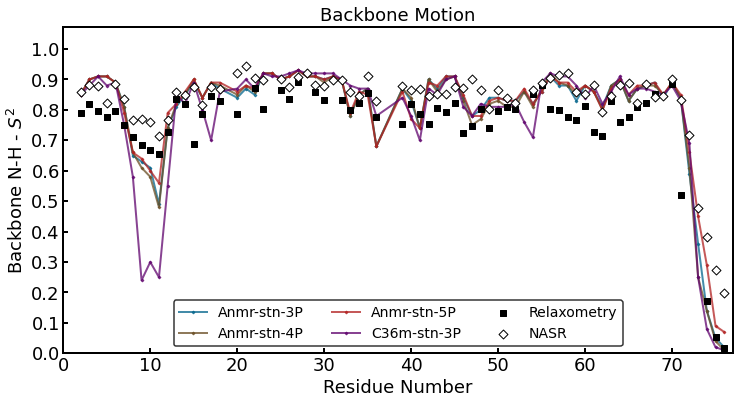

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [12, 6])

BLOCK_SIZE = 1000

for i, ff in enumerate(md_data): 
    label = md_data[ff]['label']
    res_idx = md_data[ff]['res_idx']
    
    #print (ff)
    
    if ff not in SUBLIST and plot_sublist: 
        continue
        
    idx = dict_id.index(ff)
    label = labels_new[idx]
    color = get_color(labels[idx])

    ax.plot(res_idx, md_data[ff][BLOCK_SIZE][0], marker = 'D', lw = 2,
                    mfc=color, mec = color, ms = 2, color=color, label = label, alpha = 0.75)
    
    # to plot a difference 
    # plot_with_style(ax, res_idx, md_data[ff][BLOCK_SIZE] - md_data['test_001'][BLOCK_SIZE], label , get_color(label))
    #plt.axhspan(-0.05,0.05, facecolor='0.6', alpha=0.5)

# Overlay the experimental data:

ax.scatter(list(exper['Residue']), list(exper['S2']), marker = 's', s = 40, facecolor='black', 
           edgecolors='black', label = 'Relaxometry', zorder=10)

plot_exper(ax, exper_rb['Residue_number'], exper_rb['S2_NASR'], label = 'NASR', marker = 'D',
          color = 'white', s = 40)

#legend = ax.legend(ncol=2, fontsize = 18, fancybox=True, edgecolor='black', loc='lower center')
legend = ax.legend(ncol=3, fontsize = 14, fancybox=True, edgecolor='black', loc='lower center')



ax.set_title(r'Backbone Motion', fontsize=18)

#ax.set_ylabel(r'${\Delta}S^{2}$')
ax.set_ylabel(r'Backbone N-H - $S^{2}$', fontsize=18)
ax.set_xlabel('Residue Number', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_xlim([0,77])
ax.set_ylim([0,1.072])
#ax.set_ylim([-0.2, 0.2])

ax.set_yticks(np.arange(0, 1.001, 0.1))
ax.set_yticklabels(np.round(np.arange(0, 1.001, 0.1), 1), fontsize = 18)


ax.tick_params(axis="both",direction="in", length = 5, width = 2, labelsize=18)
ax.tick_params(axis="both",direction="in", length = 5, width = 2, labelsize=18)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

frame = legend.get_frame()
frame.set_linewidth(1.5)


In [11]:
# fig.savefig('./ired_backbone_main_methods.pdf', dpi=300, facecolor='white')

### Adding a cartoon representation of the secondary structure to the plot
this will tweak the fig variable defined above

In [12]:
from tempfile import gettempdir
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.sequence as seq
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb
import biotite.database.rcsb as rcsb
import biotite.database.entrez as entrez
import biotite.application.dssp as dssp


In [13]:
class HelixPlotter(graphics.FeaturePlotter):

    def __init__(self):
        pass

    # Check whether this class is applicable for drawing a feature
    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "helix":
                    return True
        return False

    # The drawing function itself
    def draw(self, axes, feature, bbox, loc, style_param):
        # Approx. 1 turn per 3.6 residues to resemble natural helix
        n_turns = np.ceil((loc.last - loc.first + 1) / 3.6)
        x_val = np.linspace(0, n_turns * 2*np.pi, 100)
        # Curve ranges from 0.3 to 0.7
        y_val = (-0.4*np.sin(x_val) + 1) / 2

        # Transform values for correct location in feature map
        x_val *= bbox.width / (n_turns * 2*np.pi)
        x_val += bbox.x0
        y_val *= bbox.height
        y_val += bbox.y0

        # Draw white background to overlay the guiding line
        background = Rectangle(
            bbox.p0, bbox.width, bbox.height, color="white", linewidth=0
        )
        axes.add_patch(background)
        axes.plot(
            x_val, y_val, linewidth=3, color= 'seagreen' #biotite.colors["dimgreen"]
        )


class SheetPlotter(graphics.FeaturePlotter):

    def __init__(self, head_width=0.8, tail_width=0.5):
        self._head_width = head_width
        self._tail_width = tail_width


    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "sheet":
                    return True
        return False

    def draw(self, axes, feature, bbox, loc, style_param):
        x = bbox.x0
        y = bbox.y0 + bbox.height/2
        dx = bbox.width
        dy = 0

        if  loc.defect & seq.Location.Defect.MISS_RIGHT:
            # If the feature extends into the prevoius or next line
            # do not draw an arrow head
            draw_head = False
        else:
            draw_head = True


        p = biotite.AdaptiveFancyArrow(x, y, dx, dy,
            self._tail_width*bbox.height, self._head_width*bbox.height,
            # Create head with 90 degrees tip
            # -> head width/length ratio = 1/2
            head_ratio=0.5, draw_head=draw_head,
            color='lightgrey', linewidth=0,
        )

        # Doesn't work somehow...

        p.set_edgecolor('black')
        p.set_linewidth(100)
        p.set_ls('-')
        p.set_alpha(0.75)

        # print (vars(p))

        axes.add_patch(p)
        """
        axes.add_patch(biotite.AdaptiveFancyArrow(
            x, y, dx, dy,
            self._tail_width*bbox.height, self._head_width*bbox.height,
            # Create head with 90 degrees tip
            # -> head width/length ratio = 1/2
            head_ratio=0.5, draw_head=draw_head,
            color=biotite.colors["orange"], linewidth=0,
        ))
        """

annotation = seq.Annotation([
seq.Feature("SecStr", [seq.Location(23, 34)], {"sec_str_type" : "helix"}),
seq.Feature("SecStr", [seq.Location(56, 59)], {"sec_str_type" : "helix"}),
seq.Feature("SecStr", [seq.Location(1, 7)], {"sec_str_type" : "sheet"}),
seq.Feature("SecStr", [seq.Location(11, 17)], {"sec_str_type" : "sheet"}),
seq.Feature("SecStr", [seq.Location(40, 45)], {"sec_str_type" : "sheet"}),
seq.Feature("SecStr", [seq.Location(48, 50)], {"sec_str_type" : "sheet"}),
seq.Feature("SecStr", [seq.Location(64, 72)], {"sec_str_type" : "sheet"}),
])


In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_axes = inset_axes(ax,
                        width="100%", # width = 30% of parent_bbox
                        height=0.5, # height : 1 inch
                        loc='upper center')


In [15]:
graphics.plot_feature_map(
    inset_axes, annotation, multi_line=False, loc_range=(0,76),
    # Register our drawing functions
    feature_plotters=[HelixPlotter(), SheetPlotter()]
);

In [16]:
fig.savefig('./ired_backbone_main_methods_withCartoon.pdf', dpi=300, facecolor='white')

# Do the plot for only the 7 isoleucines (pannel B of figure)

In [35]:
# The cells below can be run on either the full data or a subset of the data (based on SUBLIST)
# To change this behavior, simply adapt the variable plot_sublist

plot_sublist = False

In [36]:
ile_idx = [md_data['test_001']['res_idx'].index(k) for k in [3, 13, 23, 30, 36, 44, 61]]

if plot_sublist:
    offset = np.arange(-len(md_data)/2, len(md_data)/2, 1) / 2
else:
    offset = np.array([-2, -2, -1, -1, 1, 1, 2, 2, 2])  /2 
x = np.arange(len(ile_idx)) * 10

0 test_001
1 test_002
2 test_015
3 test_003
4 test_010
5 test_014
6 test_011
7 charmm
8 test_005
[0.88150517 0.85913513 0.89748594 0.87800919 0.82785299 0.85298242
 0.88196888]


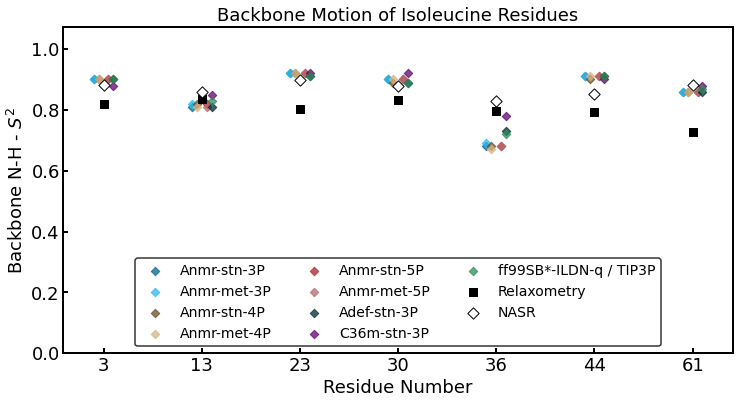

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [12, 6])

BLOCK_SIZE = 1000

for i, ff in enumerate(md_data): 
    label = md_data[ff]['label']
    res_idx = md_data[ff]['res_idx']
    
    print (i, ff)
    
    if ff not in SUBLIST and plot_sublist: 
        continue
        
    idx = dict_id.index(ff)
    label = labels_new[idx]
    color = get_color(labels[idx])
            
    ax.scatter( x + offset[i], np.array(md_data[ff][BLOCK_SIZE][0])[ile_idx], 
               marker = 'D', color=color, label = label, alpha = 0.75)
    


# Overlay the experimental data:

ile_idx_exp1 = [list(exper['Residue']).index(k) for k in [3, 13, 23, 30, 4, 44, 61]]

ax.scatter(x, exper['S2'][ile_idx_exp1], marker = 's', s = 64, facecolor='black', 
edgecolors='black', label = 'Relaxometry', zorder=10)

ile_idx_exp2 = [list(exper_rb['Residue_number']).index(k) for k in [3, 13, 23, 30, 36, 44, 61]]

print (np.array(exper_rb['S2_NASR'])[ile_idx_exp2])

plot_exper(ax, x, np.array(exper_rb['S2_NASR'])[ile_idx_exp2], label = 'NASR', marker = 'D',
          color = 'white', s = 64)


legend = ax.legend(ncol=3, fontsize = 14, fancybox=True, edgecolor='black', loc='lower center')
ax.set_title(r'Backbone Motion of Isoleucine Residues', fontsize=18)

ax.set_ylabel(r'Backbone N-H - $S^{2}$', fontsize=18)
ax.set_xlabel('Residue Number', fontsize=18)

plt.xticks(x, fontsize=18)
ax.set_xticklabels([3, 13, 23, 30, 36, 44, 61], fontsize=18)
plt.yticks(fontsize=18)

ax.set_ylim([0., 1.072])

ax.tick_params(axis="both",direction="in", length = 5, width = 2, labelsize=18)
ax.tick_params(axis="both",direction="in", length = 5, width = 2, labelsize=18)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

frame = legend.get_frame()
frame.set_linewidth(1.5)

In [24]:
fig.savefig('/home/cchampion/tmp/ired_main_sideChain_NEW.png', dpi=300, facecolor='white')
#fig.savefig('/home/cchampion/tmp/ired_all_sideChain_NEW.png', dpi=300, facecolor='white')

## Get errors for specific regions 

In [26]:
def compare_md_with_rb(md_data, exper_rb, specific = None):
    
    indx_exp = list(exper_rb['Residue_number'])
    s2_exp = list(np.array(exper_rb['S2_NASR']))
        
    x = []
    y = []
    
    for i in range(1, 77):
        if i not in indx_exp or i not in list(md_data['res_idx']):
            continue
        
        if specific is not None and i in specific:
            continue
        if i in [1, 19, 24, 37, 38, 53]: # skip nans
            continue
        
        idx_exp = indx_exp.index(i)
        x.append(s2_exp[idx_exp])
        
        idx_exp = md_data['res_idx'].index(i)
        y.append(md_data[1000][0][idx_exp])
        
    print (f'{np.average(np.abs(np.array(x)-np.array(y))):.3f}')
    print (f'n = {len(y)}')
    
def compare_md_with_ferrage(md_data, exper_ff, specific = None):
    
    indx_exp = list(np.array(exper['Residue'], dtype=int))
    s2_exp = list(exper['S2'])
    
    x = []
    y = []
    
    for i in range(1, 77):
        if i not in indx_exp or i not in list(md_data['res_idx']):
            continue
        
        if specific is not None and i in specific:
            continue
        
        idx_exp = indx_exp.index(i)
        x.append(s2_exp[idx_exp])
        
        idx_exp = md_data['res_idx'].index(i)
        y.append(md_data[1000][0][idx_exp])
        
    print (f'{np.average(np.abs(np.array(x)-np.array(y))):.3f}')
    print (f'n = {len(y)}')

In [32]:
SUBLIST

['test_001', 'test_015', 'test_010', 'charmm']

In [31]:
# Here the cell can be executed for each of the four force field combinations by changing the index of SUBLIST

ff = SUBLIST[0]

np.set_printoptions(precision=2)

compare_md_with_ferrage(md_data[ff],exper)
compare_md_with_rb(md_data[ff],exper_rb)
print ('\n')

# all but the loop:
compare_md_with_ferrage(md_data[ff],exper, specific = [8, 9, 10, 11, 12])
compare_md_with_rb(md_data[ff],exper_rb,  specific = [8, 9, 10, 11, 12])
print ('\n')

compare_md_with_ferrage(md_data[ff], exper, specific = np.append(np.arange(1, 8), np.arange(13, 76)))
compare_md_with_rb(md_data[ff], exper_rb,  specific = np.append(np.arange(1, 8), np.arange(13, 76)))
print ('\n')




0.088
n = 64
0.071
n = 70


0.070
n = 59
0.048
n = 65


0.255
n = 6
0.341
n = 6


